# Fundamental Frequency Estimation

Additional Resources

[[1] Gerhard survey](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.58.834&rep=rep1&type=pdf)

[[2]Illinois ECE420 notes](https://courses.engr.illinois.edu/ece420/sp2019/4_PitchDetermination.pdf)

[[3] Wikipedia](https://en.wikipedia.org/wiki/Pitch_detection_algorithm)

In [30]:
import librosa
import os
from os import path
import scipy as sp
import numpy as np
import IPython.display as ipd
from librosa.display import waveplot, specshow
import matplotlib.pyplot as plt

%matplotlib inline


In [8]:
data_dir = "data"

In [13]:
def plot_spec(signal, sr=16000, win_length=None, hop_length=None, return_spec=False):
    if win_length is None:
        win_length = int(sr * 0.030)
        
    if hop_length is None:
        hop_length = int(sr * 0.010)
        
    Sxx = librosa.core.stft(
        signal,
        win_length=win_length,
        hop_length=hop_length,
        n_fft=4096
    )

    spec = librosa.amplitude_to_db(np.abs(Sxx), ref=np.max)
    specshow(
        spec,
        sr=sr,
        x_axis='time',
        y_axis='hz',
        cmap='gray_r'
    )
    plt.colorbar(format='%+2.0f dB')
    
    if return_spec:
        return spec

In [60]:
def pure_tone(f, t):
    return np.sin(2 * np.pi * f * t)


def harmonized_tone(f, t):
    signal = pure_tone(f, t)
    for multiple in np.arange(2, 10):
        signal += np.exp(-multiple) * pure_tone(f * multiple, t)
    return signal


def harmonized_tone_no_f0(f, t):
    signal = np.zeros((len(t),))
    for multiple in np.arange(2, 10):
        signal += np.exp(-multiple) * pure_tone(f * multiple, t)
    return signal


def overlapping_harmonized_tones(f, t):
    # start with a first tone, and add in a tone (same harmonic structure) with an f0 that is half that of the first signal
    return harmonized_tone(f, t) + harmonized_tone(int(f/4.), t)

f = 1000
sr = 16000
n_seconds = 1
t = np.linspace(0, n_seconds, sr * n_seconds)

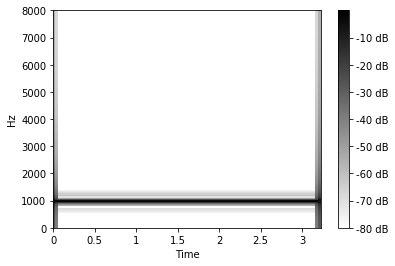

In [55]:
x = pure_tone(f, t)

plot_spec(x, sr=sr)
ipd.Audio(x, rate=sr)

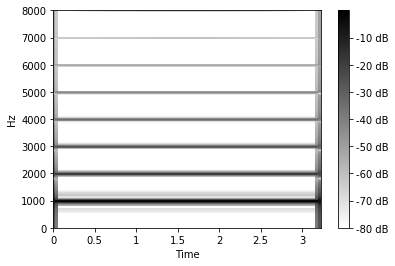

In [56]:
x = harmonized_tone(f, t)

plot_spec(x, sr=sr)
ipd.Audio(x, rate=sr)

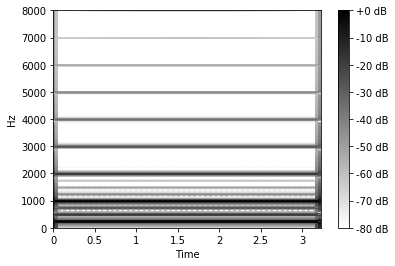

In [57]:
x = overlapping_harmonized_tones(f, t)

plot_spec(x, sr=sr)
ipd.Audio(x, rate=sr)

# Tones without their fundamental frequency
What about if we remove the fundamental frequency of a tone, leaving its harmonic structure in place? Would it sound just as pleasing, or would something sound off?

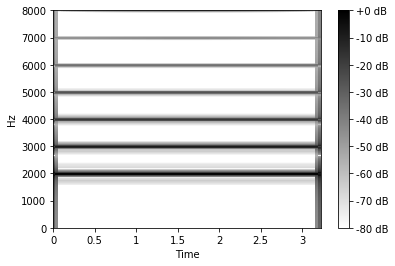

In [61]:
x = harmonized_tone_no_f0(f, t)

plot_spec(x, sr=sr)
ipd.Audio(x, rate=sr)

I claim this sounds harsher than the previous tone. You might think that, since the harmonic structure is still in place, that it might sound similar to a 2 kHz tone. However, this is not the case; the augmented tone still has harmonics at odd multiples of 1000, w

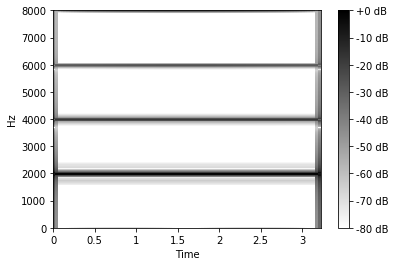

In [62]:
x = harmonized_tone(2000, t)

plot_spec(x, sr=sr)
ipd.Audio(x, rate=sr)